## Predicción de insuficiencia cardíaca

In [207]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import io
import requests

In [208]:
# df = pd.read_csv('heart_failure.csv')

url = 'https://raw.githubusercontent.com/casasmgb/curso-ml/main/01-section/regression/heart_failure.csv'
data = requests.get(url).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')))

Verificamos que no existan nulos o NaN

In [209]:
print('null value\n',df.isnull().sum(axis=0),'\n')
print('NaN value\n',df.isna().sum(axis=0),'\n')

null value
 edad                       0
anemia                     0
creatinina_fosfoquinasa    0
diabetes                   0
fraccion_eyeccion          0
presion_sanguinea_alta     0
plaquetas                  0
creatinina_serica          0
sodio_serico               0
sexo                       0
tabaquismo                 0
tiempo                     0
EVENTO_MUERTE              0
dtype: int64 

NaN value
 edad                       0
anemia                     0
creatinina_fosfoquinasa    0
diabetes                   0
fraccion_eyeccion          0
presion_sanguinea_alta     0
plaquetas                  0
creatinina_serica          0
sodio_serico               0
sexo                       0
tabaquismo                 0
tiempo                     0
EVENTO_MUERTE              0
dtype: int64 



Correlacion de edad y el evento de muerte

In [210]:
df_corr = df[["edad", "EVENTO_MUERTE"]]
df_corr.corr()

,edad,EVENTO_MUERTE
edad,1.000000,0.253729
EVENTO_MUERTE,0.253729,1.000000


In [211]:
df_corr = df[["anemia", "EVENTO_MUERTE"]]
df_corr.corr()

,anemia,EVENTO_MUERTE
anemia,1.00000,0.06627
EVENTO_MUERTE,0.06627,1.00000


In [212]:
df_corr = df[["creatinina_fosfoquinasa", "EVENTO_MUERTE"]]
df_corr.corr()

,creatinina_fosfoquinasa,EVENTO_MUERTE
creatinina_fosfoquinasa,1.000000,0.062728
EVENTO_MUERTE,0.062728,1.000000


## Correlacion de todo el dataset

|Greys|Purples|Blues|Greens|Oranges|Reds|YlOrBr|YlOrRd|OrRd|PuRd|RdPu|BuPu|GnBu|PuBu|YlGnBu|PuBuGn|BuGn|YlGn|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|

https://matplotlib.org/stable/tutorials/colors/colormaps.html

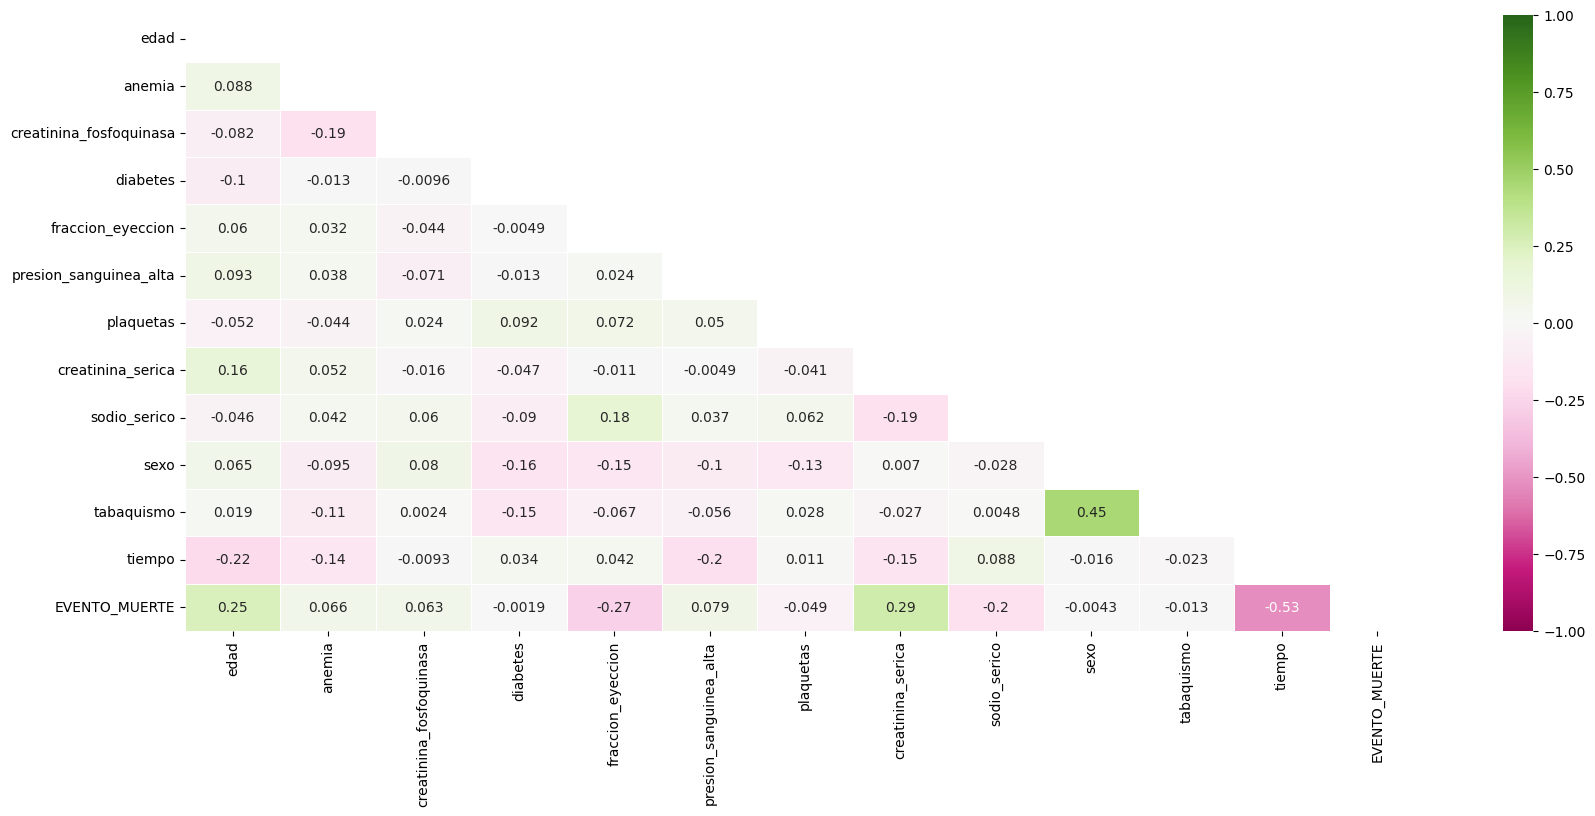

In [213]:
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=np.bool_))

plt.figure(figsize=(20,8))

sns.heatmap(corr_df,
            vmin=-1, vmax=1,
            annot=True,
            cmap='PiYG',
            mask=mask,
            linewidths=.5)
plt.show()

# Separado de datos de entrenamiento y prueba

In [214]:
x = df['tiempo'].to_numpy().reshape(-1, 1)
y = df['EVENTO_MUERTE'].to_numpy()

# transform = StandardScaler()
# x = transform.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [215]:
x_train[5], x_test[5], y_train[5], y_test[5]

(array([79]), array([20]), 0, 1)

In [216]:
print('porcentaje de datos para x\n')
print((x_train.shape[0] * 100) / x.shape[0])
print((x_test.shape[0] * 100) / x.shape[0])

print('\nporcentaje de datos para y\n')
print((y_train.shape[0] * 100) / y.shape[0])
print((x_test.shape[0] * 100) / y.shape[0])

porcentaje de datos para x

69.89966555183946
30.100334448160535

porcentaje de datos para y

69.89966555183946
30.100334448160535


## Modelo

Funcion de base radial

Radial Basis Function (RBF)

La función kernel RBF para dos puntos X₁ y X₂ calcula la similitud o qué tan cerca están uno del otro. 

![](https://miro.medium.com/v2/resize:fit:530/format:webp/1*ZMCGXM4ROxEXlNe0SUlToA.jpeg)

In [217]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

SVR()

## Prediccion

In [224]:
y_pred = regressor.predict(x_test)

print ('Datos prediccion')
print(y_pred.round().astype('int'))
print('\n')
print ('Datos prueba')
print(y_test)

Datos prediccion
[0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]


Datos prueba
[0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1]


In [219]:
pos = 25

y_ = regressor.predict([x_test[pos]])

print (x_test[pos], y_test[pos])
print (y_)

[271] 0
[0.0935594]
